In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel("trafikKaza.xlsx")

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10),names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
df.corr()

,AY,KAZA SAAT,OLU SAYISI,YARALI SAYISI,TASIT SAYISI,SERIT SAYISI,ARAC MODELI,EHLIYET YILI
AY,1.000000,-0.048140,0.192056,0.190836,0.181467,0.072514,-0.083867,0.168808
KAZA SAAT,-0.048140,1.000000,0.212373,0.197918,-0.078590,-0.133363,0.332867,-0.116067
OLU SAYISI,0.192056,0.212373,1.000000,0.696173,0.148361,-0.056902,0.158590,-0.072260
YARALI SAYISI,0.190836,0.197918,0.696173,1.000000,0.267511,0.016592,0.140423,0.053437
TASIT SAYISI,0.181467,-0.078590,0.148361,0.267511,1.000000,0.117212,-0.034167,0.061349
SERIT SAYISI,0.072514,-0.133363,-0.056902,0.016592,0.117212,1.000000,-0.279354,0.150796
ARAC MODELI,-0.083867,0.332867,0.158590,0.140423,-0.034167,-0.279354,1.000000,0.001160
EHLIYET YILI,0.168808,-0.116067,-0.072260,0.053437,0.061349,0.150796,0.001160,1.000000


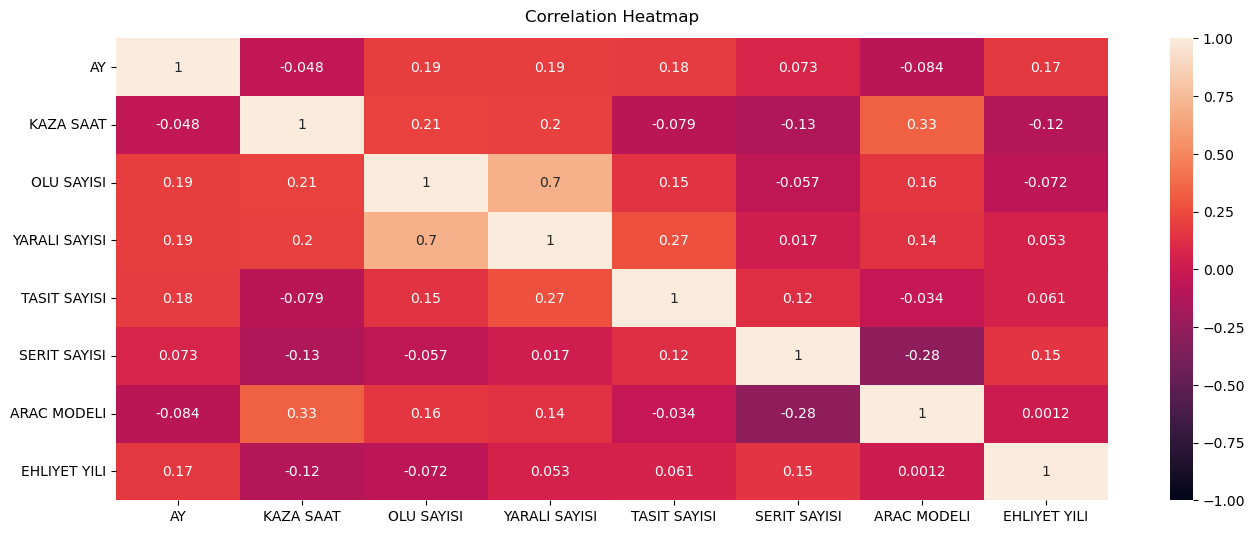

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))  # Düzeltme: Figür boyutu burada belirlendi

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

In [14]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def predict(self, X):
        return self.net_input(X)

In [29]:
X = df[['OLU SAYISI']].values
y = df['EHLIYET YILI'].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD(eta=0.1, n_iter=50, random_state=1)
lr.fit(X_std, y_std)

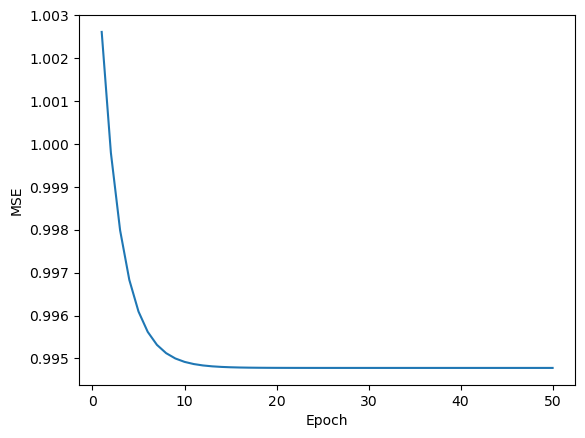

In [30]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [31]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

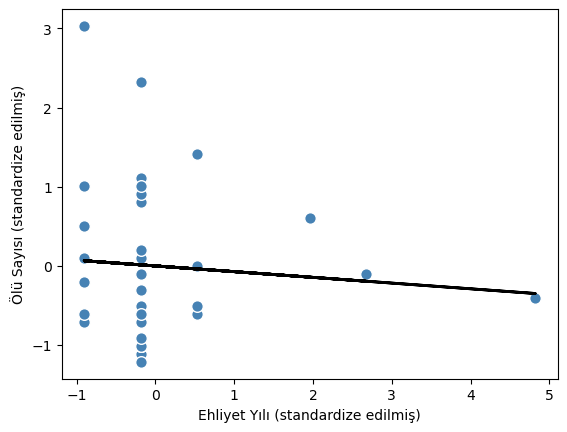

In [39]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Ehliyet Yılı (standardize edilmiş)')
plt.ylabel('Ölü Sayısı (standardize edilmiş)')
plt.show()

In [40]:
feature_value = np.array([[1]])  
feature_std = sc_x.transform(feature_value)
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))

print(f'Ölümlü Kaza: {target_reverted[0][0]:.2f}')


Ölümlü Kaza: 12.13


In [41]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')


Slope: -0.072
Intercept: 0.000


In [42]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slope: -0.511
Intercept: 12.645


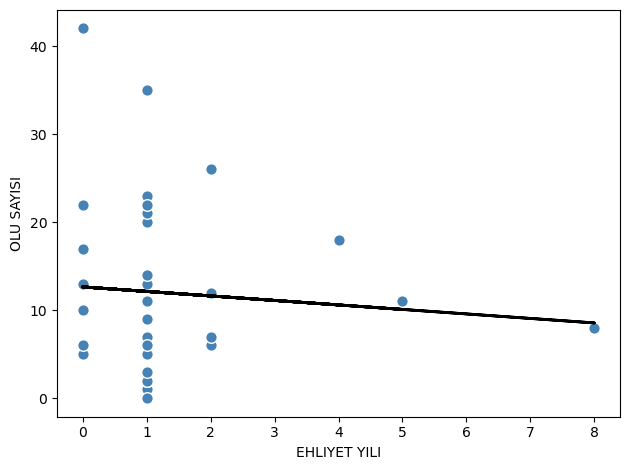

In [46]:
lin_regplot(X, y, slr)
plt.xlabel('EHLIYET YILI')
plt.ylabel('OLU SAYISI')
plt.tight_layout()
plt.show()